# Grove Light Sensor 1.1

This example shows how to use the [Grove Light Sensor v1.1](http://www.seeedstudio.com/wiki/Grove_-_Light_Sensor). You will also see how to plot a graph using matplotlib.

The Grove Light Sensor produces an analog signal which requires an ADC.

The Grove Light Sensor, Pmod Stickit, and Grove I2C ADC are used for this example. 

The resistance of the LDR or Photoresistor will decrease when the ambient light intensity increases. This means that the output signal from this module will be HIGH in bright light, and LOW in the dark. Resistance value ranges from ~5.0 (bright) to >35.0 (dark).

### 1. Load overlay.

In [1]:
from pynq import Overlay
Overlay("pmod.bit").download()

### 2. Read single luminance value
This example shows on how to get a single luminance sample from the Grove ADC to which the Grove Light sensor is connected.


In [43]:
from pynq.pmods import Grove_Light

# Grove Stickit is connected to 1st PMOD 1 labeled JB
# Grove ADC is connected to GR 4
lgt = Grove_Light(1, 4)
sensor_val = lgt.read()
print(float("{0:.2f}".format(sensor_val)))

48.0


### 3. Vary the light intensities
This example records multiple resistance samples to indicate a change on the light intensity.

To change the light intensity, wave your hand over the light sensor.

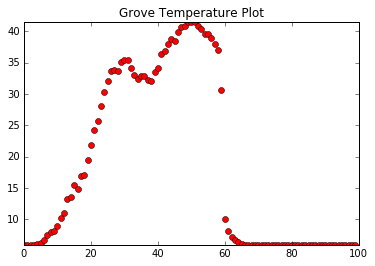

In [3]:
import time

%matplotlib inline
import matplotlib.pyplot as plt

lgt.set_log_interval_ms(100)
lgt.start_log()
time.sleep(10) # Change input during this time
r_log = lgt.get_log()

plt.plot(range(len(r_log)), r_log, 'ro')
plt.title('Grove Temperature Plot')
min_r_log = min(r_log)
max_r_log = max(r_log)
plt.axis([0, len(r_log), min_r_log, max_r_log])
plt.show()